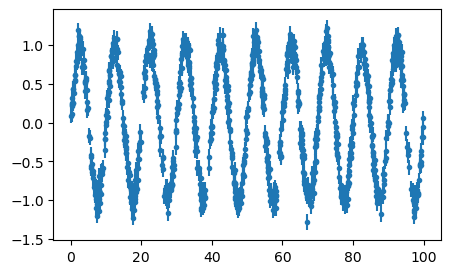

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import rustroperiods
import P4J

N = 1000
mjd = np.sort(100*np.random.rand(N))
mag = np.sin(2.*np.pi*mjd/10)
err = np.ones_like(mag)*0.1
mag += np.random.randn(len(mag))*err

fig, ax = plt.subplots(figsize=(5, 3))
ax.errorbar(mjd, mag, err, fmt='.');

In [2]:
per = P4J.periodogram(method="LKSL")
per.set_data(mjd, mag, err)
%timeit -r3 per.frequency_grid_evaluation(1e-3, 3.0, 1e-4)

5.98 s ± 17.1 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


In [3]:
mjd = list(mjd)
mag = list(mag)
err = list(err)

%timeit -r3 rustroperiods.single_band_periodogram(mjd, mag, err)

How many times do I say this?
How many times do I say this?
How many times do I say this?
2.45 s ± 25.7 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
How many times do I say this?


How many times do I say this?


(0.0, 0.2)

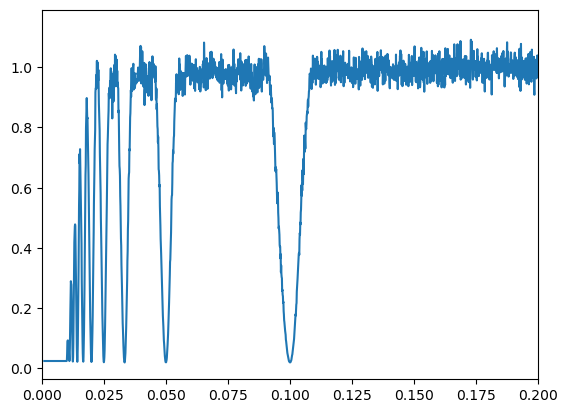

In [4]:
per = rustroperiods.single_band_periodogram(mjd, mag, err)
fig, ax = plt.subplots()
ax.plot(np.arange(1e-3, 3, 1e-4), per)
ax.set_xlim([0, 0.2])